<a href="https://colab.research.google.com/github/LahiWeer/ML_CW/blob/main/NN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
!git clone https://github.com/LahiWeer/ML_CW.git dataset_final

Cloning into 'dataset_final'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 829.61 KiB | 5.03 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [6]:
ls

dataset_final/  sample_data/


In [7]:
# Step 1: Load the dataset
data = pd.read_csv('./dataset_final/resampled_and_original_data.csv')

In [8]:
# Step 2: Inspect the data (Optional)
print(data.head())
print(data.info())

   age  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0   56                0                 0              1               0   
1   57                0                 0              0               0   
2   37                0                 0              0               0   
3   40                0                 0              0               0   
4   56                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             1            0               0   
2            0                  0             1            0               0   
3            0                  0             0            0               0   
4            0                  0             1            0               0   

   ...  campaign  pdays  previous  poutcome  emp.var.rate  con

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7917 - loss: 0.4458 - val_accuracy: 0.8367 - val_loss: 0.3658
Epoch 2/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8382 - loss: 0.3606 - val_accuracy: 0.8411 - val_loss: 0.3587
Epoch 3/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8451 - loss: 0.3541 - val_accuracy: 0.8324 - val_loss: 0.3687
Epoch 4/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8499 - loss: 0.3423 - val_accuracy: 0.8401 - val_loss: 0.3560
Epoch 5/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8509 - loss: 0.3397 - val_accuracy: 0.8451 - val_loss: 0.3514
Epoch 6/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8534 - loss: 0.3354 - val_accuracy: 0.8518 - val_loss: 0.3401
Epoch 7/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8557 - loss: 0.3328 - val_accuracy: 0.8465 - val_loss: 0.3467
Epoch 8/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8578 - loss: 0.3286 - val_accurac

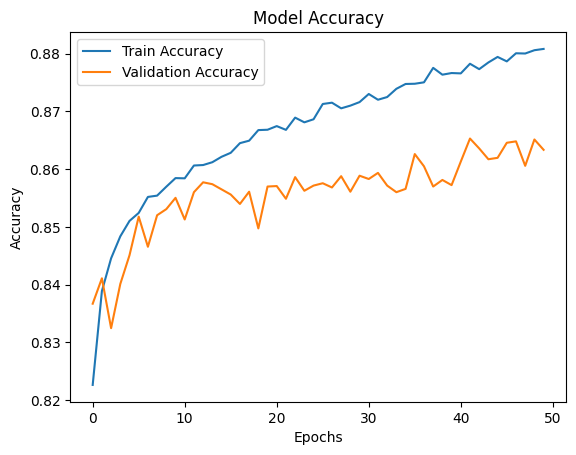

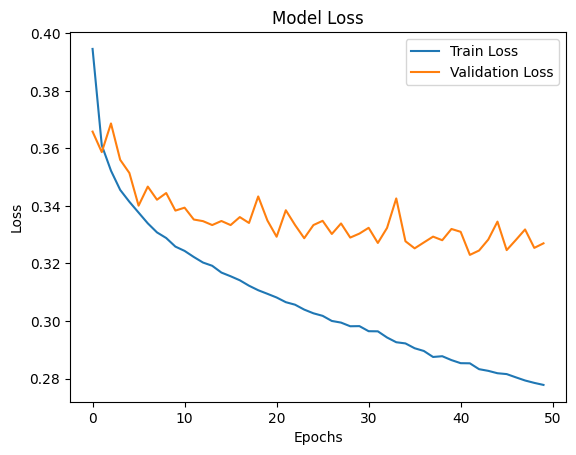

In [9]:
# Step 3: Separate features (X) and target (y)
# Replace 'target_column_name' with the actual target column name
X = data.drop('y', axis=1)
y = data['y']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Feature Scaling with Min-Max Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Build and train the Neural Network
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training history (Optional)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()